In [46]:
import psycopg2
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
import io
import schedule
import time
from datetime import date, timedelta
import win32com.client as win32
import teradatasql
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import telebot
import logging

In [ ]:
df=pd.read_csv('tmp_ak_home_tile_nps_fbc.csv')
pd.set_option('display.max_columns', 100) 
df

In [275]:
corr_matrix = df[['ltr', 'nps', 'uniq_users_tile',
       'first_buf_count_tech', 'fbc_ge_2sec', 'fbc_ge_3sec', 'fbc_ge_4sec',
       'fbc_ge_2sec_pc', 'fbc_ge_3sec_pc', 'fbc_ge_4sec_pc',
       'pc_2sec_bad_fbc_top', 'pc_3sec_bad_fbc_top', 'pc_4sec_bad_fbc_top',
       'gap_2sec', 'gap_3sec', 'gap_4sec']].corr()
corr_matrix

,ltr,nps,uniq_users_tile,first_buf_count_tech,fbc_ge_2sec,fbc_ge_3sec,fbc_ge_4sec,fbc_ge_2sec_pc,fbc_ge_3sec_pc,fbc_ge_4sec_pc,pc_2sec_bad_fbc_top,pc_3sec_bad_fbc_top,pc_4sec_bad_fbc_top,gap_2sec,gap_3sec,gap_4sec
ltr,1.000000,0.934766,-0.025856,-0.025633,-0.027700,-0.029336,-0.030750,-0.015705,-0.027564,-0.031308,0.012219,0.009890,0.009909,-0.022184,-0.029398,-0.031962
nps,0.934766,1.000000,-0.028105,-0.025288,-0.025538,-0.027144,-0.028700,-0.011302,-0.023890,-0.028531,0.012829,0.009021,0.009177,-0.017476,-0.025534,-0.029133
uniq_users_tile,-0.025856,-0.028105,1.000000,0.838158,0.783096,0.776526,0.775562,-0.024493,0.004415,0.008574,-0.094770,-0.068880,-0.052520,0.008022,0.012941,0.011121
first_buf_count_tech,-0.025633,-0.025288,0.838158,1.000000,0.965894,0.952911,0.943714,0.017284,0.031774,0.021933,-0.072692,-0.054626,-0.050685,0.046583,0.039169,0.024468
fbc_ge_2sec,-0.027700,-0.025538,0.783096,0.965894,1.000000,0.997426,0.993012,0.121539,0.127880,0.105942,-0.031427,-0.032511,-0.039690,0.147991,0.134722,0.108433
fbc_ge_3sec,-0.029336,-0.027144,0.776526,0.952911,0.997426,1.000000,0.998751,0.135397,0.147088,0.125779,-0.033475,-0.032916,-0.040948,0.164290,0.154410,0.128443
fbc_ge_4sec,-0.030750,-0.028700,0.775562,0.943714,0.993012,0.998751,1.000000,0.143137,0.158502,0.138479,-0.034614,-0.033453,-0.041814,0.173392,0.166146,0.141256
fbc_ge_2sec_pc,-0.015705,-0.011302,-0.024493,0.017284,0.121539,0.135397,0.143137,1.000000,0.890881,0.781919,0.472428,0.384363,0.312436,0.944000,0.863807,0.771500
fbc_ge_3sec_pc,-0.027564,-0.023890,0.004415,0.031774,0.127880,0.147088,0.158502,0.890881,1.000000,0.923985,0.291745,0.240959,0.195247,0.889333,0.992921,0.919954
fbc_ge_4sec_pc,-0.031308,-0.028531,0.008574,0.021933,0.105942,0.125779,0.138479,0.781919,0.923985,1.000000,0.210617,0.174235,0.142968,0.797572,0.923369,0.998890


<Axes: >

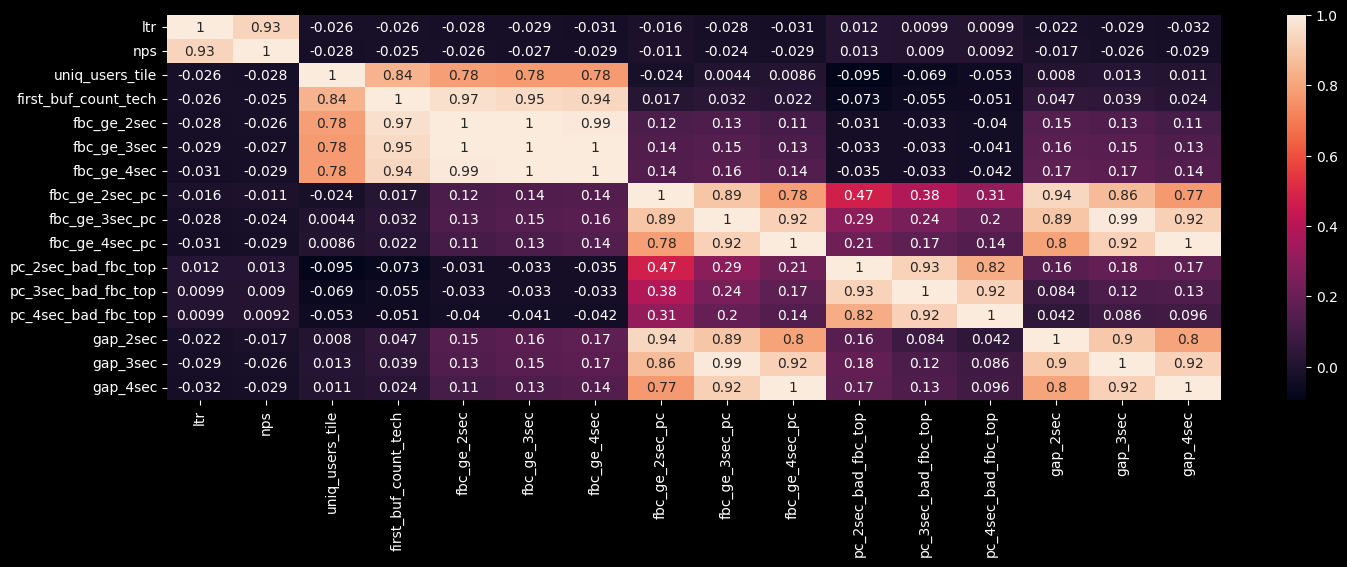

In [276]:
fig, ax = plt.subplots(figsize = (17,5))

sns.heatmap(corr_matrix, annot=True)
#sns.pairplot(corr_matrix, kind='reg')

In [ ]:
df

In [278]:
df.groupby(['report_date','home_tile'], as_index = False).agg({'subs_id': "count"}).sort_values(by = 'subs_id', ascending = False)

,report_date,home_tile,subs_id
90879,01.03.2023,4883570453425160192,39
220502,01.10.2022,5097381931239079936,38
257122,01.12.2022,5086303320797085696,38
50394,01.02.2023,4704794604392677376,36
210040,01.10.2022,4704794604392677376,36
...,...,...,...
118702,01.04.2023,4704786289335992320,1
118703,01.04.2023,4704788247841079296,1
118707,01.04.2023,4704788935035846656,1
118708,01.04.2023,4704789038115061760,1


In [ ]:
df.query("home_tile	==4883570453425160192")

In [280]:
t = df.groupby(['home_tile'], as_index = False).agg({'subs_id': "count", "ltr":"mean",
                                                 "nps":"mean", 'fbc_ge_2sec_pc':"mean",	'fbc_ge_3sec_pc':"mean",	
                                                 'fbc_ge_4sec_pc':"mean", 'gap_2sec':"mean",	'gap_3sec':"mean",
                                                 'gap_4sec':"mean"}).sort_values(by = 'subs_id', ascending = False).query('subs_id>50')
t

,home_tile,subs_id,ltr,nps,fbc_ge_2sec_pc,fbc_ge_3sec_pc,fbc_ge_4sec_pc,gap_2sec,gap_3sec,gap_4sec
10481,4704794604392677376,314,6.643312,0.012739,0.176215,0.094892,0.058909,0.176007,0.094892,0.058909
21528,4883570453425160192,307,7.905537,0.377850,0.166040,0.080326,0.046471,0.161798,0.080326,0.046471
21373,4883471256860491776,253,7.584980,0.312253,0.170517,0.080196,0.044969,0.166077,0.080196,0.044969
25379,5086303320797085696,252,7.880952,0.341270,0.161358,0.080489,0.046385,0.160581,0.080489,0.046385
21571,4883576363300159488,241,7.448133,0.236515,0.156433,0.072617,0.040665,0.151831,0.072617,0.040665
...,...,...,...,...,...,...,...,...,...,...
20159,4880742200280875008,51,7.764706,0.392157,0.135991,0.062927,0.035615,0.123781,0.062927,0.035615
22465,4891125403978039296,51,7.588235,0.254902,0.203552,0.100494,0.058828,0.187532,0.098277,0.058801
389,4675746572338724864,51,6.843137,0.156863,0.153936,0.078558,0.049931,0.148964,0.078558,0.049931
13972,4710398505921806336,51,6.411765,-0.058824,0.154345,0.077435,0.047268,0.142485,0.077435,0.047268


<Axes: >

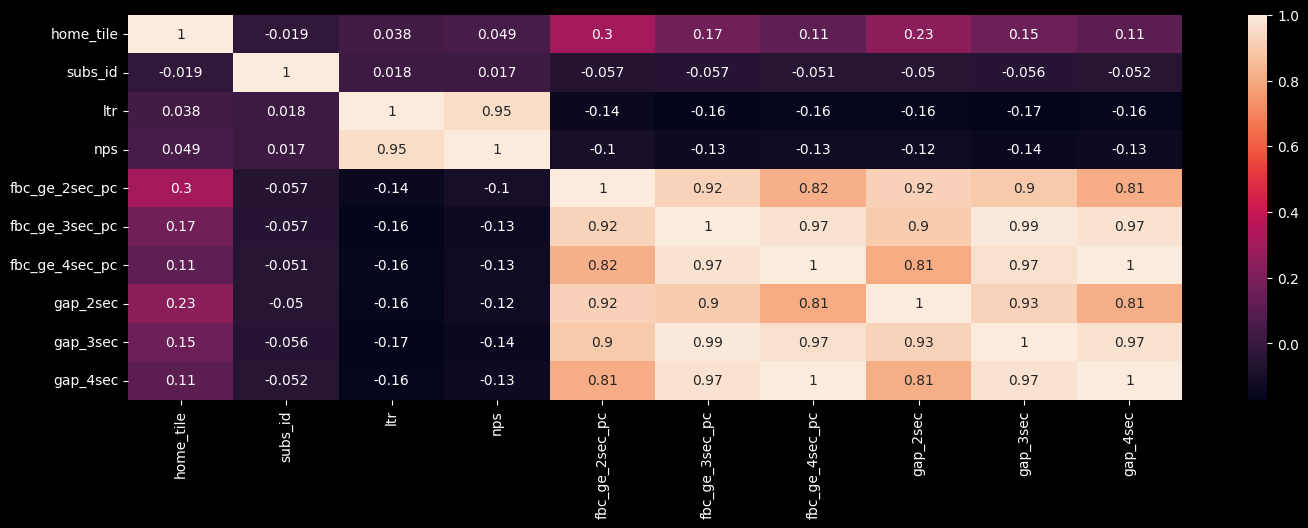

In [281]:
fig, ax = plt.subplots(figsize = (17, 5))
sns.heatmap(t.corr(), annot = True)

In [282]:
t

,home_tile,subs_id,ltr,nps,fbc_ge_2sec_pc,fbc_ge_3sec_pc,fbc_ge_4sec_pc,gap_2sec,gap_3sec,gap_4sec
10481,4704794604392677376,314,6.643312,0.012739,0.176215,0.094892,0.058909,0.176007,0.094892,0.058909
21528,4883570453425160192,307,7.905537,0.377850,0.166040,0.080326,0.046471,0.161798,0.080326,0.046471
21373,4883471256860491776,253,7.584980,0.312253,0.170517,0.080196,0.044969,0.166077,0.080196,0.044969
25379,5086303320797085696,252,7.880952,0.341270,0.161358,0.080489,0.046385,0.160581,0.080489,0.046385
21571,4883576363300159488,241,7.448133,0.236515,0.156433,0.072617,0.040665,0.151831,0.072617,0.040665
...,...,...,...,...,...,...,...,...,...,...
20159,4880742200280875008,51,7.764706,0.392157,0.135991,0.062927,0.035615,0.123781,0.062927,0.035615
22465,4891125403978039296,51,7.588235,0.254902,0.203552,0.100494,0.058828,0.187532,0.098277,0.058801
389,4675746572338724864,51,6.843137,0.156863,0.153936,0.078558,0.049931,0.148964,0.078558,0.049931
13972,4710398505921806336,51,6.411765,-0.058824,0.154345,0.077435,0.047268,0.142485,0.077435,0.047268


In [283]:
t1 = t.dropna()#subset='gap_4sec'
t1.gap_4sec.isna().sum()

0

Уравнение регрессии: y = -0.423106500927757x + 0.28; R² = 0.01


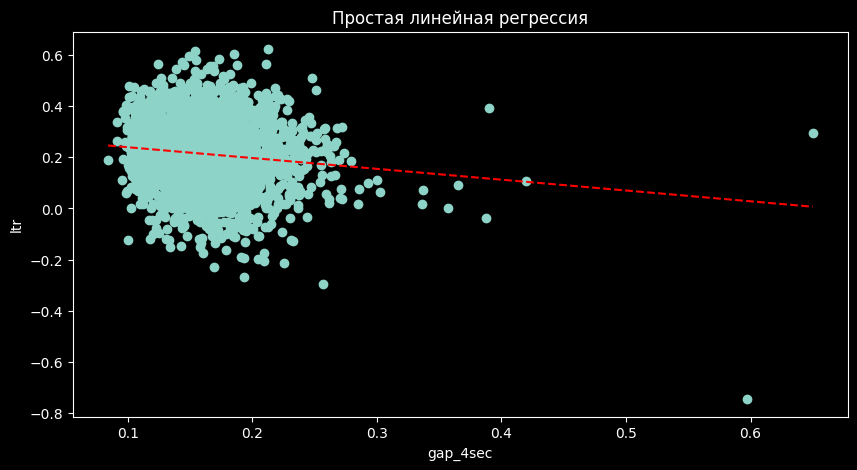

In [284]:
X = t1['gap_2sec']
y = t1['nps']
# Создать и обучить модель множественной регрессии на исходных данных
reg = LinearRegression()
reg.fit(X.values.reshape(-1, 1), y)

# Вычислить коэффициенты и сдвиг регрессии
coef = reg.coef_
c = reg.intercept_

# Вычислить коэффициент детерминации R² для модели
r2 = reg.score(X.values.reshape(-1, 1), y)

# Вывести уравнение регрессии и коэффициент детерминации R² на экран
print(f"Уравнение регрессии: y = {coef[0]}x + {round(c,2)}; R² = {round(r2, 2)}")

# Сгенерировать новые значения для переменной X для построения графика регрессии
x_values = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Сделать прогнозы для новых значений переменной X, используя обученную модель
y_pred = reg.predict(x_values)

# Построить график исходных данных и регрессионной модели
plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.plot(x_values, y_pred, '--r')
plt.xlabel('gap_4sec')
plt.ylabel('ltr')
plt.title('Простая линейная регрессия')
plt.show()

Простая линейная регрессия(логарифмированная независимая переменная)

На первых трех строках создаются переменные X, y и X_log. Переменная X соответствует столбцу 'gap_4sec' таблицы t1, переменная y - столбцу 'ltr'. Переменная X_log получается применением логарифмической функции к X, чтобы сгладить возможную нелинейность.

Дальше переменная poly_features создается с помощью PolynomialFeatures, чтобы преобразовать переменную X в полиномиальные признаки первой степени. Это необходимо для того, чтобы обучить модель множественной регрессии на полиномиальных признаках первой степени.

Затем создается объект reg класса LinearRegression() и обучается модель множественной регрессии на X_poly и y.

Далее происходит расчет коэффициентов регрессии и коэффициента детерминации. Выводится уравнение регрессии и коэффициент детерминации на экран.

Для построения графика уравнение регрессии применяется к новым значениям x_values, которые генерируются с помощью linspace. Затем строится график исходных данных и регрессионной модели. В итоге получается график логарифма разницы (ось X) и логарифма (ось Y) с линией тренда, соответствующей уравнению простой линейной регрессии.

Данный результат говорит о том, что между переменными gap_4sec и ltr существует очень слабая обратная линейная зависимость. Коэффициент детерминации R² = 0.04 означает, что только 4% дисперсии переменной ltr можно объяснить вариацией переменной gap_4sec. Значение коэффициента при x отрицательное, поэтому мы можем сделать вывод, что при увеличении логарифма разницы в секундах между нажатиями "вперед" и "назад" значение логарифма числа знаков в минуту снижается со скоростью примерно 0.33.

Если данные были получены при проведении эксперимента, то, возможно, данная зависимость только кажется слабой из-за недостаточного размера выборки или стоит обратить внимание на возможные ошибки в измерениях. Если же данные являются реальными наблюдениями, то можно сделать вывод, что переменная gap_4sec не является сильным предиктором переменной ltr.

Уравнение регрессии: y = -0.32983702811450955x + 6.39; R² = 0.04


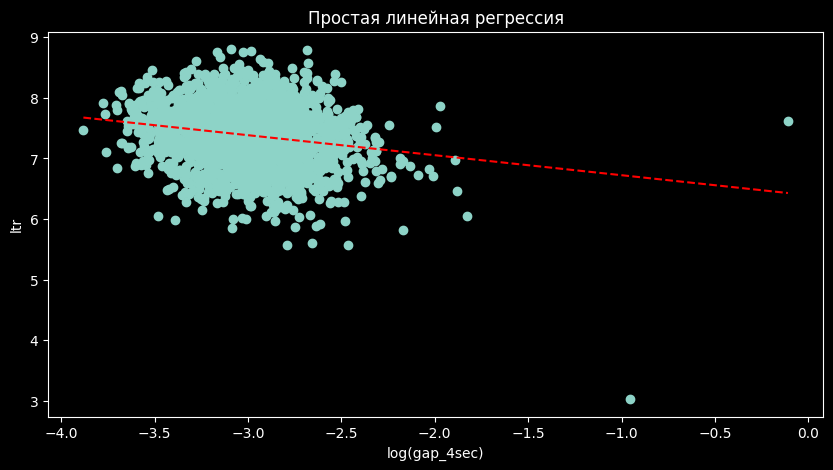

In [285]:

X = t1['gap_4sec']
y = t1['ltr']
X_log = np.log(X)
# Преобразовать переменную X в полиномиальные признаки первой степени
poly_features = PolynomialFeatures(degree=1)
X_poly = poly_features.fit_transform(X_log.values.reshape(-1, 1))

# Создать и обучить модель множественной регрессии на полиномиальных признаках первой степени
reg = LinearRegression()
reg.fit(X_poly, y)

# Вычислить коэффициенты и сдвиг регрессии
coef = reg.coef_
c = reg.intercept_

# Вычислить коэффициент детерминации R² для модели
r2 = reg.score(X_poly, y)

# Вывести уравнение регрессии и коэффициент детерминации R² на экран
print(f"Уравнение регрессии: y = {coef[1]}x + {round(c,2)}; R² = {round(r2, 2)}")

# Сгенерировать новые значения для переменной X для построения графика регрессии
x_values = np.linspace(X_log.min(), X_log.max(), 100).reshape(-1, 1)
x_values_poly = poly_features.transform(x_values)

# Сделать прогнозы для новых значений переменной X, используя обученную модель
y_pred = reg.predict(x_values_poly)

# Построить график исходных данных и регрессионной модели
plt.figure(figsize=(10,5))
plt.scatter(X_log, y)
plt.plot(x_values, y_pred, '--r')
plt.xlabel('log(gap_4sec)')
plt.ylabel('ltr')
plt.title('Простая линейная регрессия')
plt.show()

Полиномиальная регрессия

Уравнение регрессии: y = -0.9770246573421708x² + -0.018467986275617923x + 0.24; R² = 0.02


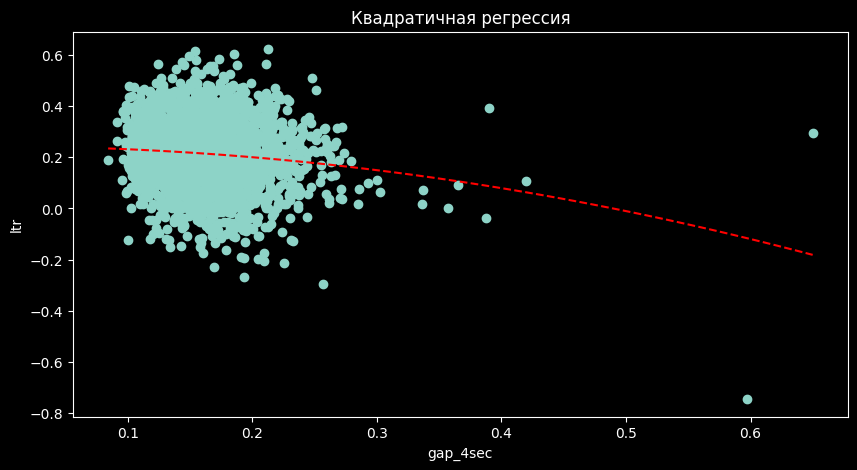

In [286]:
X = t1['gap_2sec']
y = t1['nps']
# Преобразовать переменную X в полиномиальные признаки второй степени
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X.values.reshape(-1, 1))

# Создать и обучить модель множественной регрессии
reg = LinearRegression()
reg.fit(X_poly, y)

# Вычислить коэффициенты и сдвиг регрессии
coef = reg.coef_
c = reg.intercept_

# Вычислить коэффициент детерминации R² для модели
r2 = reg.score(X_poly, y)

# Вывести уравнение регрессии и коэффициент детерминации R² на экран
print(f"Уравнение регрессии: y = {coef[2]}x² + {coef[1]}x + {round(c,2)}; R² = {round(r2, 2)}")

# Сгенерировать новые значения для переменной X для построения графика регрессии
x_values = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_values_poly = poly_features.transform(x_values)

# Сделать прогнозы для новых значений переменной X, используя обученную модель
y_pred = reg.predict(x_values_poly)

# Построить график исходных данных и регрессионной модели
plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.plot(x_values, y_pred, '--r')
plt.xlabel('gap_4sec')
plt.ylabel('ltr')
plt.title('Квадратичная регрессия')
plt.show()

Полиномиальная регрессия

Уравнение регрессии: y = -0.554149946554429x³ + -3.113472809451735x² + -6.038396828831215x + 3.36; R² = 0.03


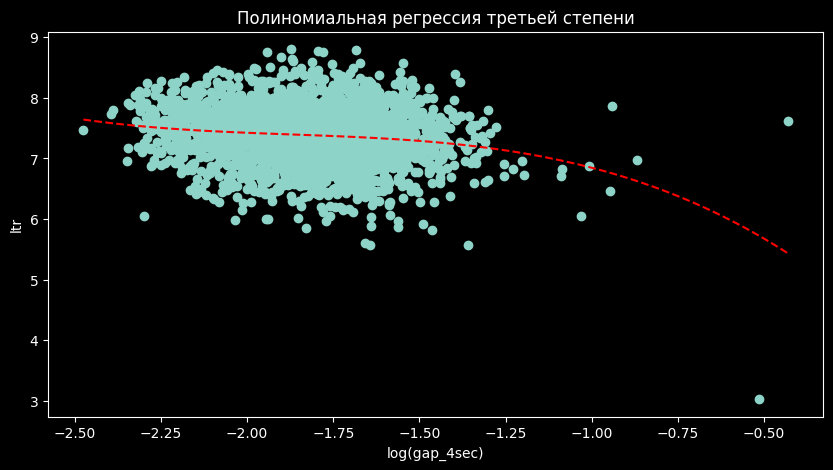

In [287]:
X = t1['gap_2sec']
y = t1['ltr']
# Применить логарифмическое преобразование к переменной X
X_log = np.log(X)
# Преобразовать переменную X в полиномиальные признаки третьей степени
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X_log.values.reshape(-1, 1))
# Создать и обучить модель множественной регрессии
reg = LinearRegression()
reg.fit(X_poly, y)
# Вычислить коэффициенты и сдвиг регрессии
coef = reg.coef_
c = reg.intercept_
# Вычислить коэффициент детерминации R² для модели
r2 = reg.score(X_poly, y)
# Вывести уравнение регрессии и коэффициент детерминации R² на экран
print(f"Уравнение регрессии: y = {coef[3]}x³ + {coef[2]}x² + {coef[1]}x + {round(c,2)}; R² = {round(r2, 2)}")
# Сгенерировать новые значения для переменной X для построения графика регрессии
x_values = np.linspace(X_log.min(), X_log.max(), 100).reshape(-1, 1)
x_values_poly = poly_features.transform(x_values)
# Сделать прогнозы для новых значений переменной X, используя обученную модель
y_pred = reg.predict(x_values_poly)
# Построить график исходных данных и регрессионной модели
plt.figure(figsize=(10,5))
plt.scatter(X_log, y)
plt.plot(x_values, y_pred, '--r')
plt.xlabel('log(gap_4sec)')
plt.ylabel('ltr')
plt.title('Полиномиальная регрессия третьей степени')
plt.show()

In [288]:
df = t.copy()

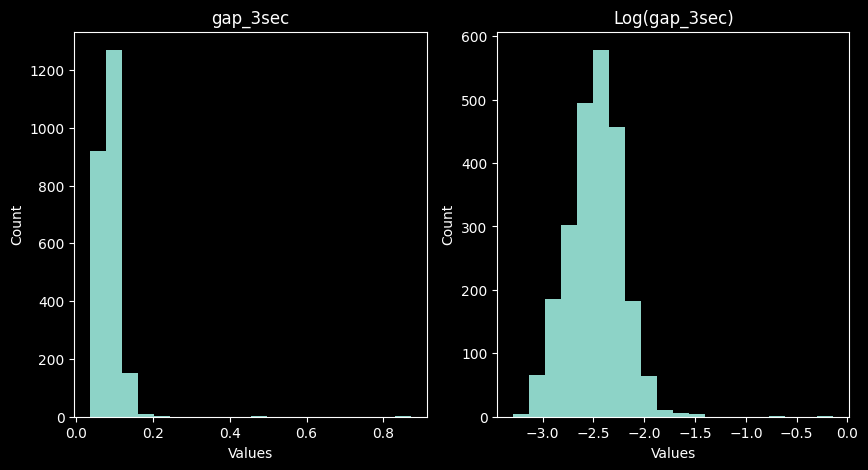

In [289]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5)) # создаем 1 строку и 2 колонки, указываем размер фигуры
axs[0].hist(df['gap_3sec'], bins=20) # гистограмма для переменной gap_3sec
axs[0].set_title('gap_3sec')
axs[1].hist(df['gap_3sec'].apply(np.log), bins=20) # гистограмма для переменной fbc_ge_2sec_pc с логарифмическим масштабом
axs[1].set_title('Log(gap_3sec)')
for ax in axs.flat:
    ax.set(xlabel='Values', ylabel='Count') # подписываем оси X и Y для каждой гистограммы
plt.show()

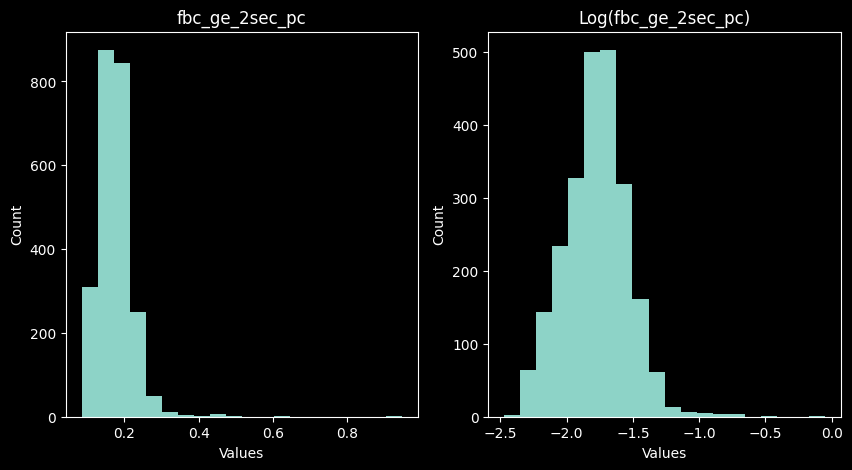

In [290]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5)) # создаем 1 строку и 2 колонки, указываем размер фигуры
axs[0].hist(df['fbc_ge_2sec_pc'], bins=20) # гистограмма для переменной gap_3sec
axs[0].set_title('fbc_ge_2sec_pc')
axs[1].hist(df['fbc_ge_2sec_pc'].apply(np.log), bins=20) # гистограмма для переменной fbc_ge_2sec_pc с логарифмическим масштабом
axs[1].set_title('Log(fbc_ge_2sec_pc)')
for ax in axs.flat:
    ax.set(xlabel='Values', ylabel='Count') # подписываем оси X и Y для каждой гистограммы  
plt.show()


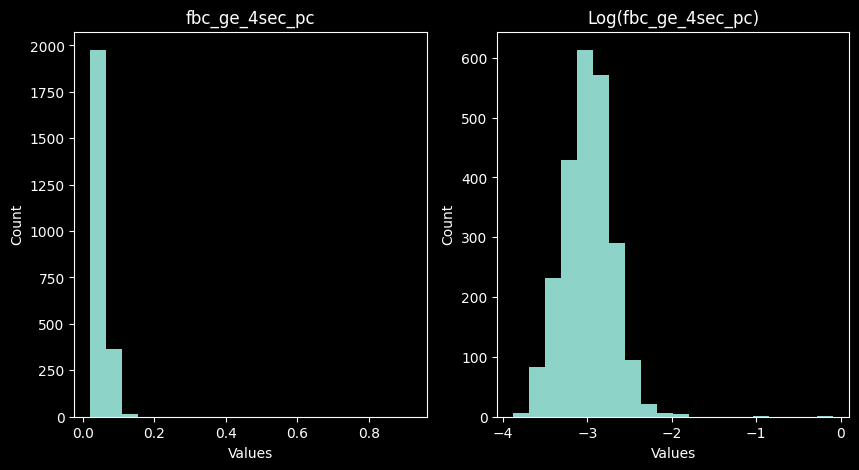

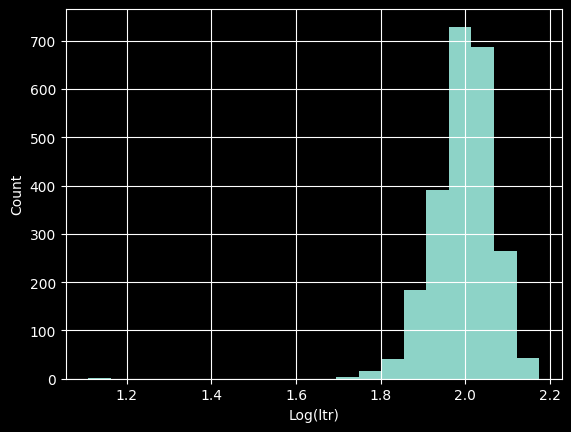

In [291]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5)) # создаем 1 строку и 2 колонки, указываем размер фигуры
axs[0].hist(df['fbc_ge_4sec_pc'], bins=20) # гистограмма для переменной gap_3sec
axs[0].set_title('fbc_ge_4sec_pc')
axs[1].hist(df['fbc_ge_4sec_pc'].apply(np.log), bins=20) # гистограмма для переменной fbc_ge_2sec_pc с логарифмическим масштабом
axs[1].set_title('Log(fbc_ge_4sec_pc)')
for ax in axs.flat:
    ax.set(xlabel='Values', ylabel='Count') # подписываем оси X и Y для каждой гистограммы
plt.show()
df['ltr'].apply(np.log).hist(bins=20)
plt.xlabel('Log(ltr)')
plt.ylabel('Count')
plt.show()


In [292]:
#чек на мультколлениарность
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[[ 'gap_3sec',  'fbc_ge_2sec_pc', 'fbc_ge_4sec_pc', 'nps']]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

          Feature         VIF
0        gap_3sec  276.041085
1  fbc_ge_2sec_pc   88.553339
2  fbc_ge_4sec_pc   84.895863
3             nps    2.956949


мульти регр - 0


In [298]:
t1 = df[['gap_3sec', 'fbc_ge_2sec_pc', 'fbc_ge_4sec_pc', 'ltr']]

poly_features = PolynomialFeatures(degree=1)

X = t1.drop(columns=['ltr']) 
y = t1['ltr']

X_log = np.log(X) 
y_log = np.log(y)

X_poly = poly_features.fit_transform(X_log) 
y_poly = poly_features.fit_transform(y_log.values.reshape(-1, 1))

reg = LinearRegression() 
reg.fit(X_poly, y_poly)

coef = reg.coef_ 
c = reg.intercept_

r2 = reg.score(X_poly, y_poly)

print(f"Уравнение регрессии: ltr = {coef[0, 1]}*ln(gap_3sec) + {coef[0, 2]}*fbc_ge_2sec_pc + {coef[0, 3]}*fbc_ge_4sec_pc + {round(c[0], 2)}; R² = {round(r2, 2)}")

Уравнение регрессии: ltr = 0.0*ln(gap_3sec) + 0.0*fbc_ge_2sec_pc + 0.0*fbc_ge_4sec_pc + 1.0; R² = 0.53


Мульти полиномиальная ~ 01 

In [301]:

t1 = df[['gap_3sec', 'fbc_ge_2sec_pc', 'fbc_ge_4sec_pc', 'ltr']]

X = t1.drop(columns=['ltr']) 
y = t1['ltr']

X_log = np.log(X) 
y_log = np.log(y)

poly_reg = PolynomialFeatures(degree=2) 
X_poly = poly_reg.fit_transform(X_log) 
reg = LinearRegression() 
reg.fit(X_poly, y_log)

coef = np.exp(reg.coef_) 
c = reg.intercept_

r2 = reg.score(X_poly, y_log)

print(f"Уравнение регрессии: ltr = {round(c, 2)} + {round(coef[0], 2)}*gap_3sec + {round(coef[1], 2)}*fbc_ge_2sec_pc + {round(coef[2], 2)}*fbc_ge_4sec_pc + {round(coef[3], 2)}gap_3secfbc_ge_2sec_pc + {round(coef[4], 2)}gap_3secfbc_ge_4sec_pc + {round(coef[5], 2)}fbc_ge_2sec_pcfbc_ge_4sec_pc; R² = {round(r2, 2)}")

Уравнение регрессии: ltr = 1.46 + 1.0*gap_3sec + 0.01*fbc_ge_2sec_pc + 7.66*fbc_ge_4sec_pc + 15.62gap_3secfbc_ge_2sec_pc + 63.95gap_3secfbc_ge_4sec_pc + 1.85fbc_ge_2sec_pcfbc_ge_4sec_pc; R² = 0.1


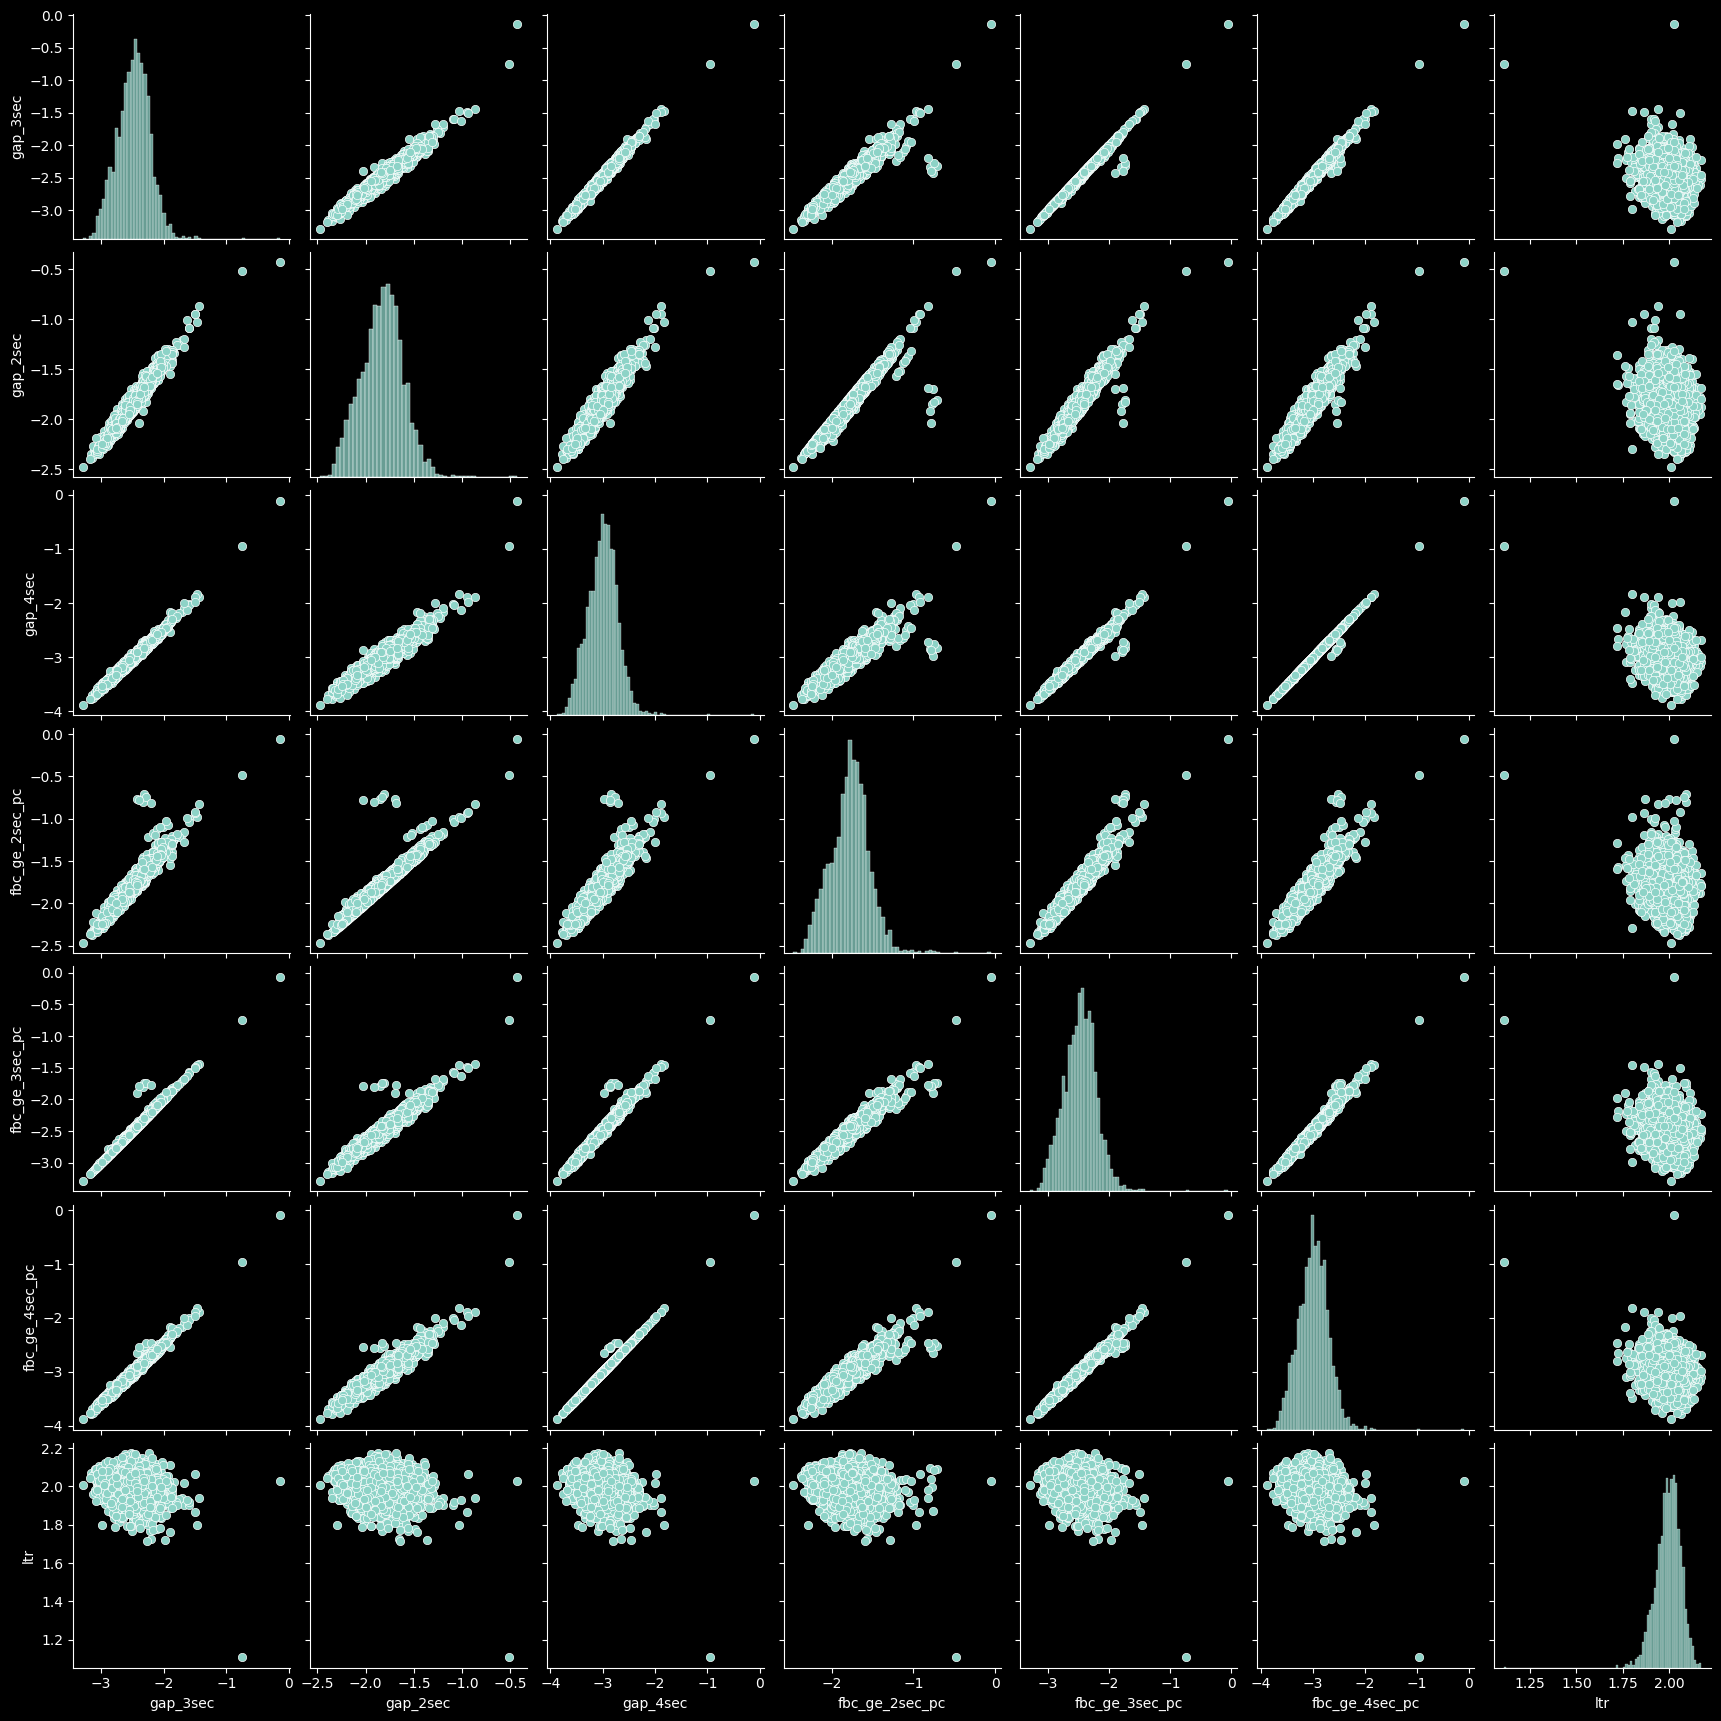

In [302]:
t1 = df[['gap_3sec', 'gap_2sec', 'gap_4sec', 'fbc_ge_2sec_pc', 'fbc_ge_3sec_pc', 'fbc_ge_4sec_pc', 'ltr']]

# создать датафрейм без зависимой переменной
t1_without_ltr = t1.drop(columns=['ltr'])

# добавить логарифмы переменных
t1_log = pd.DataFrame(np.log(t1_without_ltr), columns=t1_without_ltr.columns)

# объединить логарифмы переменных с целевой переменной
t1_log['ltr'] = np.log(t1['ltr'])

# нарисовать графики для каждой пары переменных
sns.pairplot(t1_log)